In [1589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [1590]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0


In [1591]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    if 6<= row["Total Row Score C"] <=15 :
        return 1
    else:
        return 2

In [1592]:
Output = df.apply(pin_update, axis=1)
df['Output'] = Output
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0,1
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0,1
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0,1


In [1593]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Pan 1',
          'Total Row Score A',
          'Goslon Score A', 
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Pan 1.1',
          'Total Row Score B',
          'Goslon Score B',
          'Output']]

df1.shape

(123, 19)

In [1594]:
df1.iloc[1:, :]

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Goslon Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B,Goslon Score B,Output
Center,,,,,,,,,,,,,,,,,,,
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,23,2.0,0.0,0.0,0.0,0.0,6.0,4.0,0.0,13,2.0,0
H,9.0,0.0,0.0,0.0,6.0,1.0,0.0,21,2.0,9.0,0.0,2.0,4.0,6.0,0.0,0.0,25,2.0,1
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,10,1.0,0.0,3.0,0.0,0.0,6.0,3.0,0.0,10,2.0,1
H,9.0,0.0,1.0,0.0,6.0,0.0,0.0,25,2.0,9.0,1.0,2.0,0.0,6.0,0.0,0.0,26,2.0,1
H,0.0,0.0,0.0,0.0,6.0,0.0,0.0,10,2.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,23,2.0,9.0,0.0,0.0,0.0,6.0,3.0,0.0,21,2.0,0
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,21,2.0,12.0,0.0,3.0,4.0,6.0,0.0,0.0,32,4.0,0
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,25,3.0,9.0,0.0,0.0,0.0,6.0,0.0,0.0,23,2.0,1


In [1595]:
x = np.array([df["Anteroposterior 1"], df["Anteroposterior 2"],df["Vertical 1"],df["Vertical 2"],df["Total Row Score A"],df["Total Row Score B"]]).T

y = np.array(df["Total Row Score C"]).T


In [1596]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)


In [1597]:
target_column = "Output"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)


In [1598]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)


In [1599]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))


X_train: (92, 38)
y_train: (92,)
X_test: (31, 38)
y_test: (31,)


In [1600]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(38,)))
basic_model.add(Dense(2, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)


In [1601]:
#basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
#basic_model.fit(X_train, y_train, epochs=1)

In [1602]:
# loss_and_metrics = basic_model.evaluate(X_test, y_test)
# print(loss_and_metrics)
# print('Loss = ',loss_and_metrics[0])
# print('Accuracy = ',loss_and_metrics[1])

In [1603]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(92, 38)
(92,)
(31, 38)
(31,)


In [1604]:
predicted = basic_model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [1605]:
# predicted = tf.squeeze(predicted)
# predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
# actual = np.array(y_test)
# conf_mat = confusion_matrix(actual, predicted)
# displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
# displ.plot()


# Kun A-værdier! 

In [1606]:
target_column = "Output"
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_58576/3048013620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [1607]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)


In [1608]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(92, 18)
(92,)
(31, 18)
(31,)


In [1609]:
basic_model = Sequential()
basic_model.add(Dense(units=32, activation='relu', input_shape=(18,)))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(8,activation = "tanh"))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.01)



In [1610]:
# earlystop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, mode='max')
# basic_model = Sequential()
# basic_model.add(Dense(1012, input_dim=9, activation = 'relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(512, activation='relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(128, activation='relu'))
# basic_model.add(Dropout(0.5))
# basic_model.add(Dense(32, activation='relu'))
# basic_model.add(Dense(1, activation='sigmoid'))
# adam_opt = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# basic_model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])


In [1619]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train1, y_train1, epochs=150)


Epoch 1/150
3/3 [==============================] - 0s 2ms/step - loss: -0.9038 - accuracy: 0.5870
Epoch 2/150
3/3 [==============================] - 0s 2ms/step - loss: -0.9735 - accuracy: 0.5543
Epoch 3/150
3/3 [==============================] - 0s 2ms/step - loss: -1.0996 - accuracy: 0.5761
Epoch 4/150
3/3 [==============================] - 0s 1ms/step - loss: -1.1398 - accuracy: 0.5870
Epoch 5/150
3/3 [==============================] - 0s 2ms/step - loss: -1.2304 - accuracy: 0.5435
Epoch 6/150
3/3 [==============================] - 0s 1ms/step - loss: -1.3468 - accuracy: 0.6087
Epoch 7/150
3/3 [==============================] - 0s 1ms/step - loss: -1.4350 - accuracy: 0.5870
Epoch 8/150
3/3 [==============================] - 0s 1ms/step - loss: -1.4977 - accuracy: 0.6087
Epoch 9/150
3/3 [==============================] - 0s 2ms/step - loss: -1.5046 - accuracy: 0.5978
Epoch 10/150
3/3 [==============================] - 0s 1ms/step - loss: -1.6567 - accuracy: 0.6304
Epoch 11/150
3/3 [=

In [1620]:
loss_and_metrics1 = basic_model.evaluate(X_test1, y_test1)
print(loss_and_metrics1)
print('Loss = ',loss_and_metrics1[0])
print('Accuracy = ',loss_and_metrics1[1])

1/1 [==============================] - 0s 70ms/step - loss: 2.4824 - accuracy: 0.4194
[2.48240065574646, 0.4193548262119293]
Loss =  2.48240065574646
Accuracy =  0.4193548262119293


In [1621]:
predicted = basic_model.predict(X_test1)

1/1 [==============================] - 0s 34ms/step


tf.Tensor(
[8.0526925e-06 1.0000000e+00 3.7352464e-03 2.6011352e-05 4.1548838e-06
 1.0000000e+00 1.5498397e-05 3.8189267e-08 1.0000000e+00 9.9999863e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 7.2658129e-02
 3.6074407e-02 9.1736256e-06 4.3153185e-12 1.0000000e+00 1.0000000e+00
 6.8425356e-06 1.0000000e+00 1.7180154e-12 1.0000000e+00 1.0000000e+00
 9.9999046e-01 1.5926498e-01 1.0000000e+00 7.0740658e-05 1.0000000e+00
 4.5466963e-03], shape=(31,), dtype=float32)


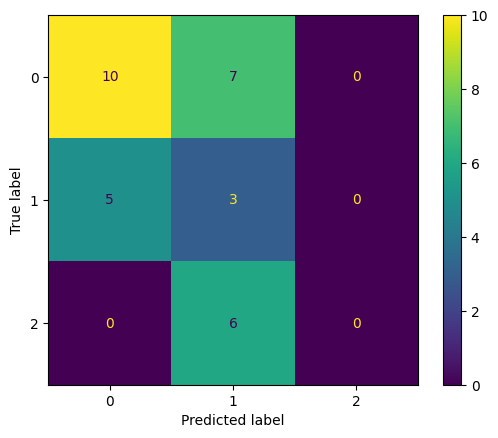

In [1622]:
predicted = tf.squeeze(predicted)
print(predicted)
predicted = np.array([0 if x <= 0.5 else 1 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [1615]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[8] = np.round(vector[7]/9)
    vector[16] = sum(vector[9:16])
    vector[17] = np.round(vector[16]/9)
    print(vector)

In [1624]:
"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'



xnew = np.array([12,0,2,6,1,0,1,0, 0, 
                 12,0,2,6,1,0,0, 0, 0])


total_row_score(xnew)

xnew.shape


[12  0  2  6  1  0  1 22  2 12  0  2  6  1  0  0 21  2]


(18,)

In [1625]:
prediction = basic_model.predict(xnew.reshape(1,18))
predicted = tf.squeeze(prediction)
print(predicted)
predicted = np.array([1 if predicted >= 0.5 else 0 ])
predicted

1/1 [==============================] - 0s 13ms/step
tf.Tensor(1.0, shape=(), dtype=float32)


array([1])